### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [3]:
players_data = pd.read_csv("players_list.csv")

In [4]:
players_data.head()

,Unnamed: 0,Player,Match_played,Starts,Minutes_played,Gls,Ast,Shots,shots_on_target,goals_per_shot,...,penalty_kick_won,penalty_kick_conceded,own_goal,aerial_duo_won,aerial_duo_lost,Pos,Age,Club_country,Club,Team
0,0,Emiliano Martínez,7,7,690,0,0,0,0,NaN,...,0.0,0.0,0,2.0,0.0,GK,29,eng,Aston Villa,Argentina
1,1,Lionel Messi,7,7,690,7,3,27,13,0.11,...,1.0,0.0,0,2.0,7.0,FW,34,fr,Paris S-G,Argentina
2,2,Nicolás Otamendi,7,7,690,0,1,1,0,0.00,...,0.0,1.0,0,21.0,13.0,DF,34,pt,Benfica,Argentina
3,3,Rodrigo De Paul,7,7,599,0,0,7,3,0.00,...,0.0,0.0,0,2.0,3.0,MF,28,es,Atlético Madrid,Argentina
4,4,Nahuel Molina,7,6,567,1,1,2,1,0.50,...,0.0,0.0,0,0.0,6.0,DF,24,es,Atlético Madrid,Argentina


In [5]:
print(players_data.columns)

Index(['Unnamed: 0', 'Player', 'Match_played', 'Starts', 'Minutes_played',
       'Gls', 'Ast', 'Shots', 'shots_on_target', 'goals_per_shot',
       'goals_per_shot_on_target', 'non_penalty_goals', 'penalty_goal', 'CrdY',
       'CrdR', 'pass_comp', 'pass_attempt', 'pass_comp%', 'tackles_made',
       'successful_tackles', 'Blocks', 'interceptions', 'clearence', 'Err',
       'Touches', 'successful_dribbles', 'dribbles_attempted',
       'successful_dribbles%', 'fouls_commited', 'fouls_drawn', 'offside',
       'crosses', 'penalty_kick_won', 'penalty_kick_conceded', 'own_goal',
       'aerial_duo_won', 'aerial_duo_lost', 'Pos', 'Age', 'Club_country',
       'Club', 'Team'],
      dtype='object')


In [6]:
players_data = players_data.rename(columns={'Gls': 'goals', 'Ast': 'assist'})

In [7]:
players_data = players_data.rename(columns={'CrdY': 'yellow_card', 'CrdR': 'red_card'})

In [8]:
print(players_data.columns)

Index(['Unnamed: 0', 'Player', 'Match_played', 'Starts', 'Minutes_played',
       'goals', 'assist', 'Shots', 'shots_on_target', 'goals_per_shot',
       'goals_per_shot_on_target', 'non_penalty_goals', 'penalty_goal',
       'yellow_card', 'red_card', 'pass_comp', 'pass_attempt', 'pass_comp%',
       'tackles_made', 'successful_tackles', 'Blocks', 'interceptions',
       'clearence', 'Err', 'Touches', 'successful_dribbles',
       'dribbles_attempted', 'successful_dribbles%', 'fouls_commited',
       'fouls_drawn', 'offside', 'crosses', 'penalty_kick_won',
       'penalty_kick_conceded', 'own_goal', 'aerial_duo_won',
       'aerial_duo_lost', 'Pos', 'Age', 'Club_country', 'Club', 'Team'],
      dtype='object')


In [9]:
print(players_data.shape)

(680, 42)


In [10]:
print(players_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                680 non-null    int64  
 1   Player                    680 non-null    object 
 2   Match_played              680 non-null    int64  
 3   Starts                    680 non-null    int64  
 4   Minutes_played            680 non-null    int64  
 5   goals                     680 non-null    int64  
 6   assist                    680 non-null    int64  
 7   Shots                     680 non-null    int64  
 8   shots_on_target           680 non-null    int64  
 9   goals_per_shot            431 non-null    float64
 10  goals_per_shot_on_target  247 non-null    float64
 11  non_penalty_goals         680 non-null    int64  
 12  penalty_goal              680 non-null    int64  
 13  yellow_card               680 non-null    int64  
 14  red_card  

In [11]:
print(players_data.describe())

       Unnamed: 0  Match_played      Starts  Minutes_played       goals  \
count  680.000000    680.000000  680.000000      680.000000  680.000000   
mean   339.500000      2.933824    2.070588      191.194118    0.250000   
std    196.443376      1.520611    1.753856      147.774808    0.698726   
min      0.000000      1.000000    0.000000        1.000000    0.000000   
25%    169.750000      2.000000    1.000000       68.000000    0.000000   
50%    339.500000      3.000000    2.000000      173.000000    0.000000   
75%    509.250000      4.000000    3.000000      270.000000    0.000000   
max    679.000000      7.000000    7.000000      690.000000    8.000000   

           assist       Shots  shots_on_target  goals_per_shot  \
count  680.000000  680.000000       680.000000      431.000000   
mean     0.177941    2.107353         0.705882        0.097448   
std      0.487652    3.031781         1.337780        0.215148   
min      0.000000    0.000000         0.000000        0.0000

### Data Cleaning

In [12]:
# Check for missing values
print(players_data.isnull().sum())

Unnamed: 0                    0
Player                        0
Match_played                  0
Starts                        0
Minutes_played                0
goals                         0
assist                        0
Shots                         0
shots_on_target               0
goals_per_shot              249
goals_per_shot_on_target    433
non_penalty_goals             0
penalty_goal                  0
yellow_card                   0
red_card                      0
pass_comp                     3
pass_attempt                  3
pass_comp%                    6
tackles_made                  3
successful_tackles            0
Blocks                        3
interceptions                 0
clearence                     3
Err                           3
Touches                       3
successful_dribbles           3
dribbles_attempted            3
successful_dribbles%        245
fouls_commited                0
fouls_drawn                   0
offside                       0
crosses 

In [ ]:
players_data = players_data.drop(columns=['goals_per_shot', 'goals_per_shot_on_target'])

In [16]:
players_data = players_data.drop(columns=['Err'])

In [17]:
print(players_data[pd.isnull(players_data["Club"])])

     Unnamed: 0           Player  Match_played  Starts  Minutes_played  goals  \
391         391  Kevin Rodríguez             2       0               2      0   

     assist  Shots  shots_on_target  non_penalty_goals  ...  penalty_kick_won  \
391       0      2                1                  0  ...               NaN   

     penalty_kick_conceded  own_goal  aerial_duo_won  aerial_duo_lost  Pos  \
391                    NaN         0             NaN              NaN   FW   

     Age  Club_country  Club     Team  
391   22           NaN   NaN  Ecuador  

[1 rows x 39 columns]


In [18]:
players_data.loc[players_data["Player"] == "Kevin Rodríguez", "Club"] = "Independiente del Valle"
players_data.loc[players_data["Player"] == "Kevin Rodríguez", "Club_country"] = "Ecuador"

In [19]:
# Check for missing values
print(players_data.isnull().sum())

Unnamed: 0                 0
Player                     0
Match_played               0
Starts                     0
Minutes_played             0
goals                      0
assist                     0
Shots                      0
shots_on_target            0
non_penalty_goals          0
penalty_goal               0
yellow_card                0
red_card                   0
pass_comp                  3
pass_attempt               3
pass_comp%                 6
tackles_made               3
successful_tackles         0
Blocks                     3
interceptions              0
clearence                  3
Touches                    3
successful_dribbles        3
dribbles_attempted         3
successful_dribbles%     245
fouls_commited             0
fouls_drawn                0
offside                    0
crosses                    0
penalty_kick_won           3
penalty_kick_conceded      3
own_goal                   0
aerial_duo_won             3
aerial_duo_lost            3
Pos           

In [20]:
players_data.fillna(0, inplace=True)

In [25]:
players_data = players_data.drop(columns=['Unnamed: 0'])

In [26]:
# Check for missing values
print(players_data.isnull().sum())

Player                   0
Match_played             0
Starts                   0
Minutes_played           0
goals                    0
assist                   0
Shots                    0
shots_on_target          0
non_penalty_goals        0
penalty_goal             0
yellow_card              0
red_card                 0
pass_comp                0
pass_attempt             0
pass_comp%               0
tackles_made             0
successful_tackles       0
Blocks                   0
interceptions            0
clearence                0
Touches                  0
successful_dribbles      0
dribbles_attempted       0
successful_dribbles%     0
fouls_commited           0
fouls_drawn              0
offside                  0
crosses                  0
penalty_kick_won         0
penalty_kick_conceded    0
own_goal                 0
aerial_duo_won           0
aerial_duo_lost          0
Pos                      0
Age                      0
Club_country             0
Club                     0
T

In [29]:
print(players_data["Club_country"].unique())

['eng' 'fr' 'pt' 'es' 'it' 'de' 'us' 'hr' 'sct' 'ru' 'tr' 'be' 'ma' 'sa'
 'qa' 'nl' 'mx' 'br' 'jp' 'gr' 'dk' 'au' 'ch' 'at' 'pl' 'kr' 'cn' 'ec'
 'ar' 'Ecuador' 'cm' 'uy' 'tn' 'hu' 'eg' 'kw' 'rs' 'ir' 'ae' 'cy' 'cr'
 'co']


In [30]:
country_map = {
    'eng': 'England',
    'fr': 'France',
    'pt': 'Portugal',
    'es': 'Spain',
    'it': 'Italy',
    'de': 'Germany',
    'us': 'USA',
    'hr': 'Croatia',
    'sct': 'Scotland',
    'ru': 'Russia',
    'tr': 'Turkey',
    'be': 'Belgium',
    'ma': 'Morocco',
    'sa': 'Saudi Arabia',
    'qa': 'Qatar',
    'nl': 'Netherlands',
    'mx': 'Mexico',
    'br': 'Brazil',
    'jp': 'Japan',
    'gr': 'Greece',
    'dk': 'Denmark',
    'au': 'Australia',
    'ch': 'Switzerland',
    'at': 'Austria',
    'pl': 'Poland',
    'kr': 'Korea Republic',
    'cn': 'China',
    'ec': 'Ecuador',
    'ar': 'Argentina',
    'cm': 'Cameroon',
    'uy': 'Uruguay',
    'tn': 'Tunisia',
    'hu': 'Hungary',
    'eg': 'Egypt',
    'kw': 'Kuwait',
    'rs': 'Serbia',
    'ir': 'Iran',
    'ae': 'UAE',
    'cy': 'Cyprus',
    'cr': 'Costa Rica',
    'co': 'Columbia',
}
players_data["Club_country"] = players_data["Club_country"].replace(country_map)


In [31]:
print(players_data["Club_country"].unique())

['England' 'France' 'Portugal' 'Spain' 'Italy' 'Germany' 'USA' 'Croatia'
 'Scotland' 'Russia' 'Turkey' 'Belgium' 'Morocco' 'Saudi Arabia' 'Qatar'
 'Netherlands' 'Mexico' 'Brazil' 'Japan' 'Greece' 'Denmark' 'Australia'
 'Switzerland' 'Austria' 'Poland' 'Korea Republic' 'China' 'Ecuador'
 'Argentina' 'Cameroon' 'Uruguay' 'Tunisia' 'Hungary' 'Egypt' 'Kuwait'
 'Serbia' 'Iran' 'UAE' 'Cyprus' 'Costa Rica' 'Columbia']


In [151]:
players_data.to_csv("final_player_list.csv")

### Data Visualisation

In [34]:
top_10_scorers = players_data.nlargest(10, 'goals')


In [35]:
top_10_scorers

,Player,Match_played,Starts,Minutes_played,goals,assist,Shots,shots_on_target,non_penalty_goals,penalty_goal,...,penalty_kick_won,penalty_kick_conceded,own_goal,aerial_duo_won,aerial_duo_lost,Pos,Age,Club_country,Club,Team
25,Kylian Mbappé,7,6,598,8,2,29,11,6,2,...,0.0,0.0,0,1.0,4.0,FW,23,France,Paris S-G,France
1,Lionel Messi,7,7,690,7,3,27,13,3,4,...,1.0,0.0,0,2.0,7.0,FW,34,France,Paris S-G,Argentina
8,Julián Álvarez,7,5,464,4,0,11,8,4,0,...,1.0,0.0,0,2.0,9.0,FW,22,England,Manchester City,Argentina
30,Olivier Giroud,6,6,419,4,0,16,6,4,0,...,0.0,0.0,0,19.0,13.0,FW,35,Italy,Milan,France
99,Cody Gakpo,5,5,450,3,0,5,3,3,0,...,0.0,0.0,0,5.0,5.0,"FW,MF",23,Netherlands,PSV Eindhoven,Netherlands
122,Bukayo Saka,4,4,288,3,0,7,5,3,0,...,1.0,0.0,0,1.0,1.0,FW,20,England,Arsenal,England
129,Marcus Rashford,5,1,140,3,0,11,6,3,0,...,0.0,0.0,0,1.0,3.0,FW,24,England,Manchester Utd,England
140,Richarlison,4,4,323,3,0,8,4,3,0,...,1.0,0.0,0,4.0,8.0,FW,25,England,Tottenham,Brazil
174,Gonçalo Ramos,4,2,152,3,1,7,5,3,0,...,0.0,0.0,0,4.0,6.0,"FW,MF",20,Portugal,Benfica,Portugal
282,Álvaro Morata,4,1,185,3,1,8,5,3,0,...,0.0,0.0,0,1.0,0.0,FW,29,Spain,Atlético Madrid,Spain


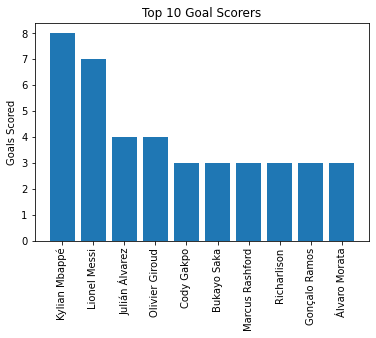

In [36]:
# Plotting the bar plot
plt.bar(top_10_scorers["Player"], top_10_scorers["goals"])

# Adding x-axis labels
plt.xticks(rotation=90)

# Adding y-axis labels
plt.ylabel("Goals Scored")

# Adding title
plt.title("Top 10 Goal Scorers")

# Show the plot
plt.show()


In [38]:
top_10_assisters = players_data.nlargest(10, 'assist')

In [39]:
top_10_assisters

,Player,Match_played,Starts,Minutes_played,goals,assist,Shots,shots_on_target,non_penalty_goals,penalty_goal,...,penalty_kick_won,penalty_kick_conceded,own_goal,aerial_duo_won,aerial_duo_lost,Pos,Age,Club_country,Club,Team
1,Lionel Messi,7,7,690,7,3,27,13,3,4,...,1.0,0.0,0,2.0,7.0,FW,34,France,Paris S-G,Argentina
27,Antoine Griezmann,7,6,537,0,3,6,2,0,0,...,0.0,0.0,0,5.0,4.0,MF,31,Spain,Atlético Madrid,France
50,Ivan Perišić,7,7,669,1,3,16,4,1,0,...,0.0,0.0,0,17.0,14.0,"FW,DF",33,England,Tottenham,Croatia
121,Harry Kane,5,5,402,2,3,10,5,1,1,...,0.0,0.0,0,9.0,13.0,FW,28,England,Tottenham,England
164,Bruno Fernandes,4,4,356,2,3,7,2,1,1,...,0.0,0.0,0,2.0,8.0,"FW,MF",27,England,Manchester Utd,Portugal
25,Kylian Mbappé,7,6,598,8,2,29,11,6,2,...,0.0,0.0,0,1.0,4.0,FW,23,France,Paris S-G,France
29,Ousmane Dembélé,7,6,433,0,2,8,2,0,0,...,0.0,1.0,0,2.0,1.0,FW,25,Spain,Barcelona,France
31,Theo Hernández,6,5,508,1,2,5,2,1,0,...,0.0,1.0,0,8.0,4.0,DF,24,Italy,Milan,France
46,Marcus Thuram,5,0,151,0,2,1,0,0,0,...,0.0,0.0,0,8.0,9.0,"FW,MF",24,Germany,M'Gladbach,France
62,Mislav Oršić,6,1,162,1,2,9,2,1,0,...,0.0,0.0,0,0.0,0.0,FW,29,Croatia,Dinamo Zagreb,Croatia


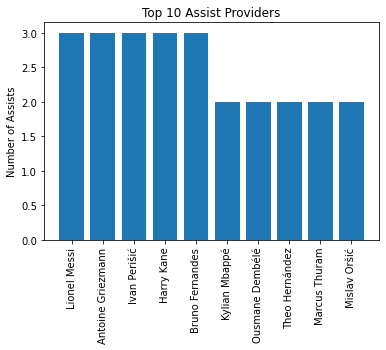

In [42]:
# Plotting the bar plot
plt.bar(top_10_assisters["Player"], top_10_assisters["assist"])

# Adding x-axis labels
plt.xticks(rotation=90)

# Adding y-axis labels
plt.ylabel("Number of Assists")

# Adding title
plt.title("Top 10 Assist Providers")

# Show the plot
plt.show()


In [52]:
team_goals = players_data.groupby("Team")["goals"].sum()
most_goals = team_goals.sort_values(ascending=False).head(10)
print(most_goals)


Team
France         16
Argentina      15
England        13
Portugal       12
Netherlands    10
Spain           9
Brazil          8
Croatia         8
Germany         6
Morocco         6
Name: goals, dtype: int64


In [53]:
# Player with most yellow cards
most_yellow = players_data.sort_values("yellow_card", ascending=False).head(15)
print(most_yellow[["Player", "Team", "yellow_card"]])

                 Player            Team  yellow_card
16      Gonzalo Montiel       Argentina            3
9          Marcos Acuña       Argentina            3
232      Jackson Irvine       Australia            2
504         Alidu Seidu           Ghana            2
487        Amadou Onana         Belgium            2
499      Daniel Amartey           Ghana            2
237       Miloš Degenek       Australia            2
612      Nemanja Gudelj          Serbia            2
606  Strahinja Pavlović          Serbia            2
605          Saša Lukić          Serbia            2
601   Nikola Milenković          Serbia            2
215  Idrissa Gana Gueye         Senegal            2
258        Fabian Schär     Switzerland            2
567     Francisco Calvo      Costa Rica            2
339      Jung Woo-young  Korea Republic            2


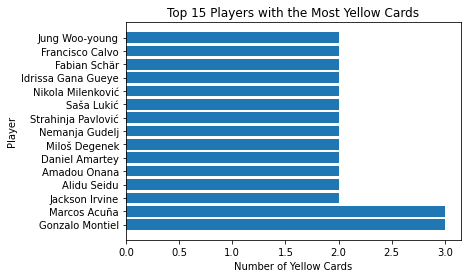

In [62]:
plt.barh(most_yellow["Player"], most_yellow["yellow_card"])
plt.xlabel("Number of Yellow Cards")
plt.ylabel("Player")
plt.title("Top 15 Players with the Most Yellow Cards")
plt.show()


In [54]:
# Team with most yellow cards
team_yellow = players_data.groupby("Team")["yellow_card"].sum()
most_team_yellow = team_yellow.sort_values(ascending=False).head(10)
print(most_team_yellow)

Team
Argentina       17
Saudi Arabia    14
Netherlands     12
Serbia          11
Morocco          9
Switzerland      9
Ghana            8
France           8
Uruguay          8
Croatia          8
Name: yellow_card, dtype: int64


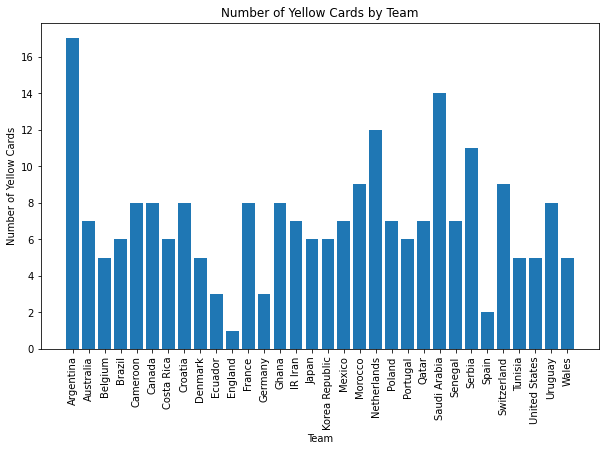

In [65]:
team_yellow = players_data.groupby("Team")["yellow_card"].sum()
fig = plt.figure(figsize=(10,6))
plt.bar(team_yellow.index, team_yellow.values)
plt.xlabel("Team")
plt.ylabel("Number of Yellow Cards")
plt.title("Number of Yellow Cards by Team")
plt.xticks(rotation=90)
plt.show()

In [68]:
player_red = players_data.groupby(["Player", "Team"])["red_card"].sum()
most_red = player_red.sort_values(ascending=False)

print(most_red[most_red > 0])

Player             Team       
Vincent Aboubakar  Cameroon       1
Walid Cheddira     Morocco        1
Denzel Dumfries    Netherlands    1
Wayne Hennessey    Wales          1
Name: red_card, dtype: int64


In [70]:

player_shots = players_data.groupby("Player")[["Shots", "shots_on_target"]].sum()
most_shots_on_target = player_shots.sort_values("shots_on_target", ascending=False)

print(most_shots_on_target.head(10))

                 Shots  shots_on_target
Player                                 
Lionel Messi        27               13
Kylian Mbappé       29               11
Julián Álvarez      11                8
Marcus Rashford     11                6
Neymar              11                6
Olivier Giroud      16                6
Dani Olmo           12                6
Raphinha             8                6
Hwang Hee-chan       6                5
Memphis             10                5


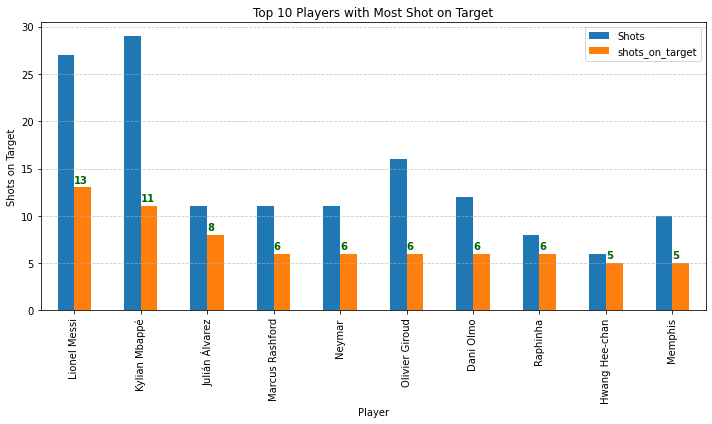

In [79]:

most_shots_on_target = most_shots_on_target.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
most_shots_on_target.plot(kind='bar', ax=ax)

ax.set_xlabel("Player")
ax.set_ylabel("Shots on Target")
ax.set_title("Top 10 Players with Most Shot on Target")
ax.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(most_shots_on_target["shots_on_target"]):
    ax.text(i, v + 0.5, str(v), color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

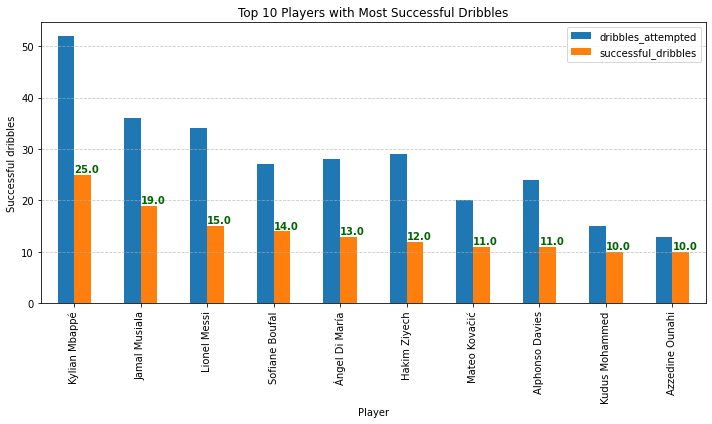

In [85]:
# get the top 10 players based on successful dribbles
player_dribbles = players_data.groupby("Player")[["dribbles_attempted", "successful_dribbles"]].sum()
successful_dribbler = player_dribbles.sort_values("successful_dribbles", ascending=False)
successful_dribbler = successful_dribbler.head(10)

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))
successful_dribbler.plot(kind='bar', ax=ax)

ax.set_xlabel("Player")
ax.set_ylabel("Successful dribbles")
ax.set_title("Top 10 Players with Most Successful Dribbles")
ax.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(successful_dribbler["successful_dribbles"]):
    ax.text(i, v + 0.5, str(v), color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

                     pass_attempt  pass_comp
Player                                      
Rodri                       689.0      642.0
Nicolás Otamendi            577.0      532.0
Rodrigo De Paul             562.0      470.0
Marcelo Brozović            530.0      466.0
Luka Modrić                 551.0      465.0
Joško Gvardiol              519.0      464.0
John Stones                 454.0      435.0
Aurélien Tchouaméni         474.0      424.0
Mateo Kovačić               460.0      415.0
Aymeric Laporte             438.0      413.0


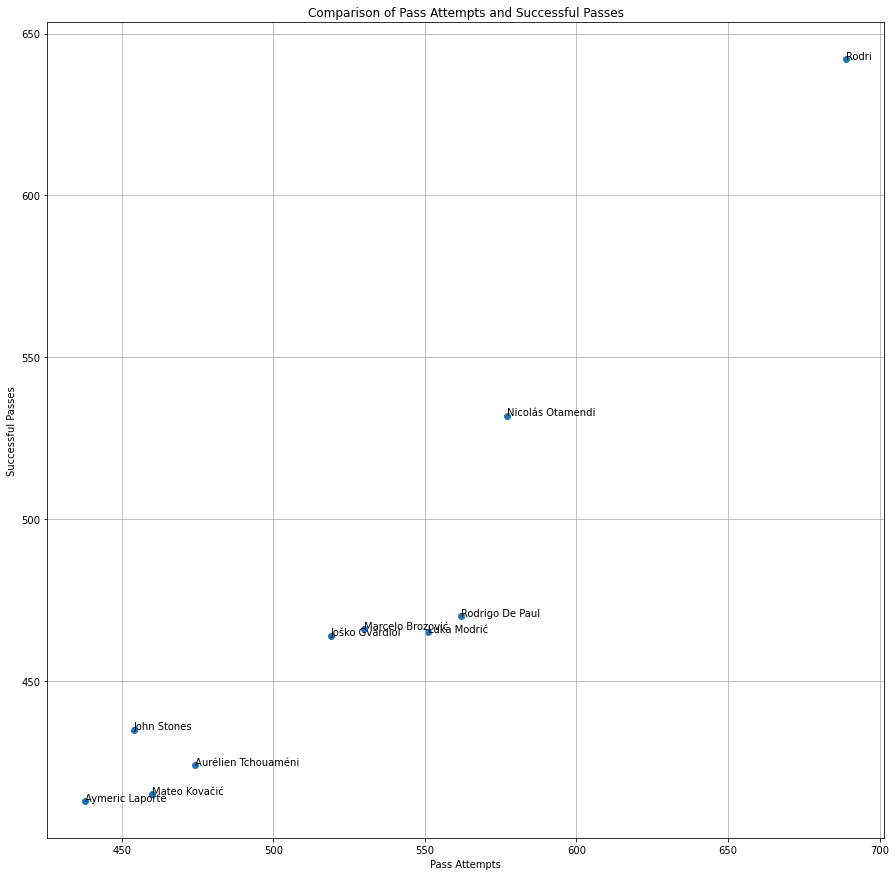

In [99]:
player_pass = players_data.groupby("Player")[["pass_attempt", "pass_comp"]].sum()
successful_passer = player_pass.sort_values("pass_comp", ascending=False)

successful_passer = successful_passer.head(10)

print(successful_passer)
plt.figure(figsize=(15,15))
plt.scatter(successful_passer['pass_attempt'], successful_passer['pass_comp'])
plt.xlabel('Pass Attempts')
plt.ylabel('Successful Passes')
plt.title('Comparison of Pass Attempts and Successful Passes')
plt.grid(True)

for i, txt in enumerate(successful_passer.index):
    plt.annotate(txt, (successful_passer['pass_attempt'][i], successful_passer['pass_comp'][i]))

plt.show()

                   tackles_made  successful_tackles
Player                                             
Achraf Hakimi              26.0                  17
Mateo Kovačić              24.0                  17
Enzo Fernández             22.0                  15
Jude Bellingham            16.0                  15
Sofyan Amrabat             16.0                  10
Luka Modrić                16.0                  10
Theo Hernández             16.0                  13
Ibrahima Konaté            15.0                   6
Eduardo Camavinga          14.0                   9
Borna Sosa                 14.0                   6


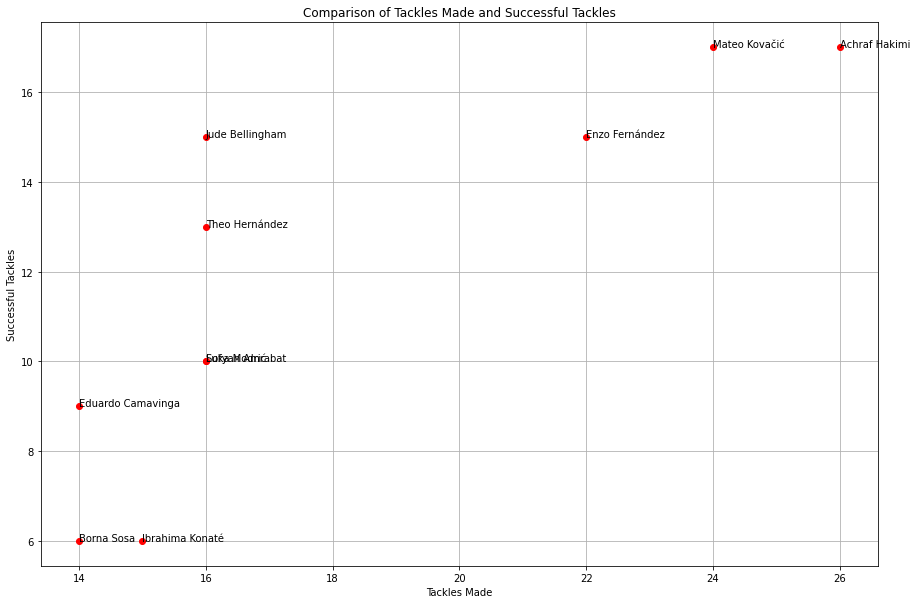

In [100]:
player_tackles = players_data.groupby("Player")[["tackles_made", "successful_tackles"]].sum()
top_tacklers = player_tackles.sort_values("tackles_made", ascending=False)

top_tacklers = top_tacklers.head(10)
print(top_tacklers)
plt.figure(figsize=(15,10))
plt.plot(top_tacklers['tackles_made'], top_tacklers['successful_tackles'], 'ro')
plt.xlabel('Tackles Made')
plt.ylabel('Successful Tackles')
plt.title('Comparison of Tackles Made and Successful Tackles')
plt.grid(True)

for i, txt in enumerate(top_tacklers.index):
    plt.annotate(txt, (top_tacklers['tackles_made'][i], top_tacklers['successful_tackles'][i]))

plt.show()

ConversionError: Failed to convert value(s) to axis units: Index(['Aurélien Tchouaméni', 'Declan Rice', 'Joško Gvardiol', 'Adrien Rabiot',
       'Hakim Ziyech', 'Jurriën Timber', 'Luka Modrić', 'Nicolás Otamendi',
       'Achraf Hakimi', 'Nicolás Tagliafico'],
      dtype='object', name='Player')

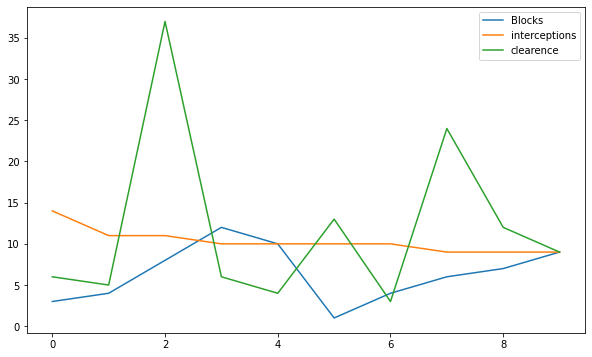

In [101]:
defensive_players = players_data.groupby("Player")[["Blocks", "interceptions", "clearence"]].sum()
top_defenders = defensive_players.sort_values("interceptions", ascending=False).head(10)

top_defenders.plot(kind='line', figsize=(10,6), xticks=top_defenders.index)
plt.xlabel('Player')
plt.ylabel('Number of defensive actions')
plt.title('Comparison of defensive actions by top 10 players')
plt.legend(['Blocks', 'Interceptions', 'Clearances'])
plt.grid(True)

plt.show()

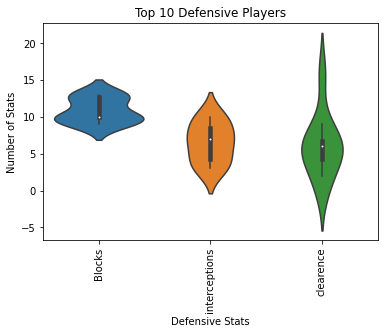

In [105]:
import seaborn as sns

defensive_stats = players_data.groupby("Player")[["Blocks", "interceptions", "clearence"]].sum()
defensive_stats = defensive_stats.sort_values(["Blocks", "interceptions", "clearence"], ascending=False)

top_10_defenders = defensive_stats.head(10)

sns.violinplot(data=top_10_defenders)
plt.xticks(rotation=90)
plt.xlabel("Defensive Stats")
plt.ylabel("Number of Stats")
plt.title("Top 10 Defensive Players")

plt.show()


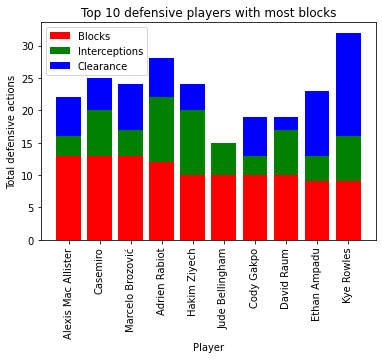

In [112]:
player_defense = players_data.groupby("Player")[["Blocks", "interceptions", "clearence"]].sum()
top_defenders = player_defense.sort_values("Blocks", ascending=False).head(10)

fig, ax = plt.subplots()
ax.bar(top_defenders.index, top_defenders["Blocks"], color='r')
ax.bar(top_defenders.index, top_defenders["interceptions"], color='g', bottom=top_defenders["Blocks"])
ax.bar(top_defenders.index, top_defenders["clearence"], color='b', bottom=top_defenders["interceptions"] + top_defenders["Blocks"])

plt.xlabel('Player')
plt.ylabel('Total defensive actions')
plt.title('Top 10 defensive players with most blocks')
plt.xticks(rotation=90)

plt.legend(['Blocks', 'Interceptions', 'Clearance'])
plt.show()

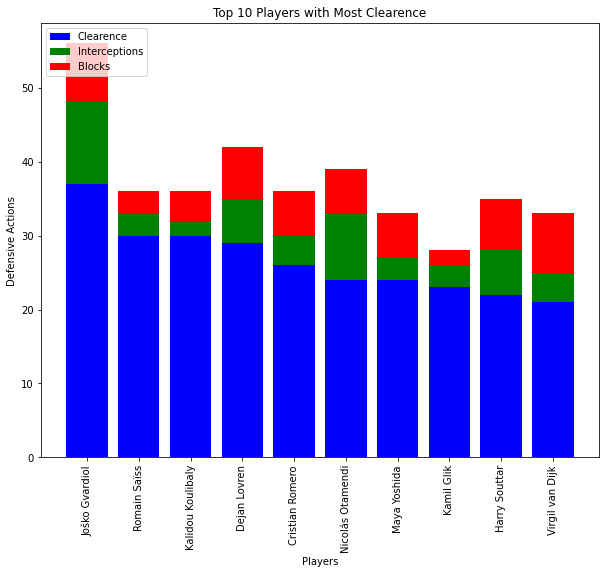

In [110]:
defensive_players = players_data.groupby("Player")[["Blocks", "interceptions", "clearence"]].sum()

top_defenders = defensive_players.sort_values("clearence", ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.bar(top_defenders.index, top_defenders['clearence'], color='b', label='Clearence')
plt.bar(top_defenders.index, top_defenders['interceptions'], color='g', label='Interceptions', bottom=top_defenders['clearence'])
plt.bar(top_defenders.index, top_defenders['Blocks'], color='r', label='Blocks', bottom=top_defenders['clearence']+top_defenders['interceptions'])

plt.xlabel("Players")
plt.ylabel("Defensive Actions")
plt.title("Top 10 Players with Most Clearence")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

Player
Cristiano Ronaldo    7
Kylian Mbappé        6
Lautaro Martínez     5
Álvaro Morata        5
Ángel Di María       5
Name: offside, dtype: int64


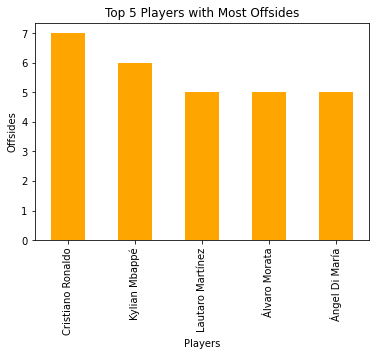

In [121]:
player_offsides = players_data.groupby("Player")["offside"].sum()
offside_players = player_offsides.sort_values(ascending=False).head(5)
print(offside_players)
offside_players.plot(kind='bar', color='orange')
plt.xlabel('Players')
plt.ylabel('Offsides')
plt.title('Top 5 Players with Most Offsides')

plt.show()

Team
Argentina         26.958333
Australia         26.700000
Belgium           27.950000
Brazil            27.500000
Cameroon          26.318182
Canada            27.368421
Costa Rica        27.090909
Croatia           27.238095
Denmark           26.550000
Ecuador           24.277778
England           26.150000
France            25.875000
Germany           26.600000
Ghana             24.950000
IR Iran           28.047619
Japan             26.818182
Korea Republic    27.333333
Mexico            27.666667
Morocco           25.840000
Netherlands       26.047619
Poland            27.095238
Portugal          25.958333
Qatar             27.600000
Saudi Arabia      27.130435
Senegal           25.800000
Serbia            26.681818
Spain             25.523810
Switzerland       26.666667
Tunisia           26.857143
United States     24.100000
Uruguay           27.631579
Wales             26.055556
Name: Age, dtype: float64


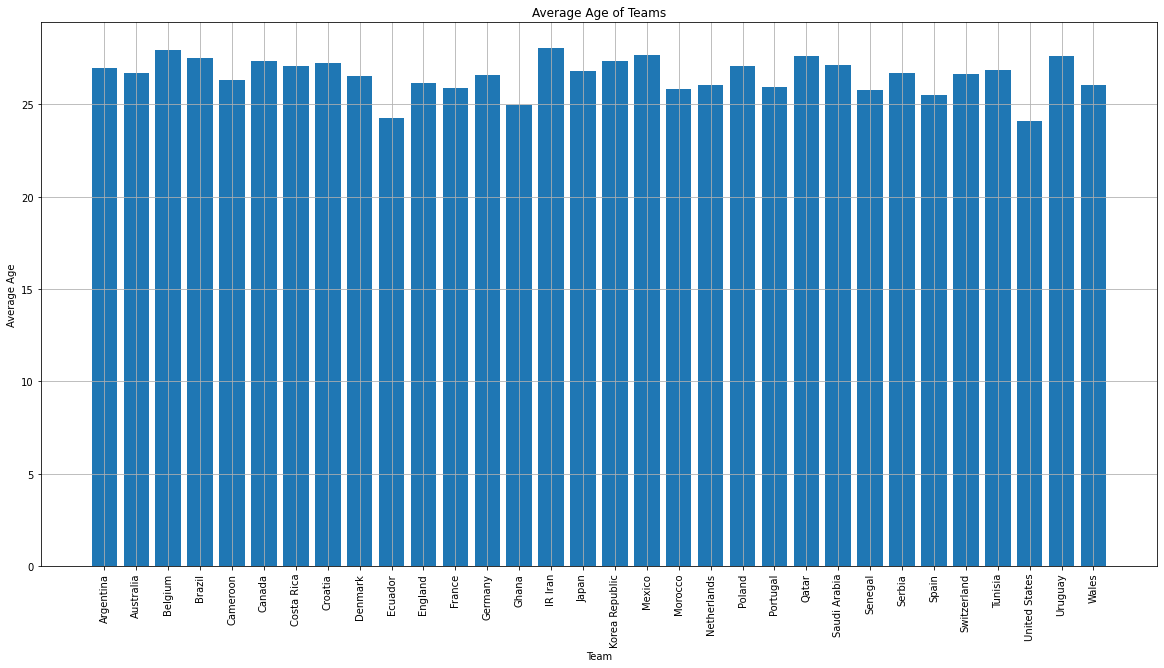

In [133]:
team_age = players_data.groupby("Team")["Age"].mean()
print(team_age)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(team_age.index, team_age.values)

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.title('Average Age of Teams')
plt.grid(True)
plt.show()

In [136]:
club_count = players_data['Club'].value_counts()
most_players_club = club_count.index[0]
print(f"Club with most players: {most_players_club}")

Club with most players: Manchester City


Top 5 Clubs with most players:
Manchester City    16
Bayern Munich      16
Barcelona          14
Al Sadd SC         13
Manchester Utd     13
Name: Club, dtype: int64


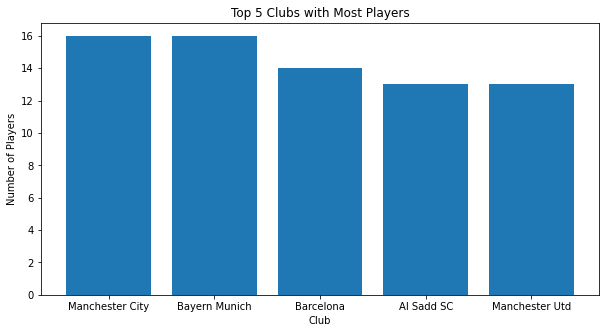

In [152]:
top_5_clubs = club_count.head(5)
plt.figure(figsize=(10,5))
print("Top 5 Clubs with most players:")
print(top_5_clubs)
plt.bar(top_5_clubs.index, top_5_clubs.values)
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.title('Top 5 Clubs with Most Players')

plt.show()

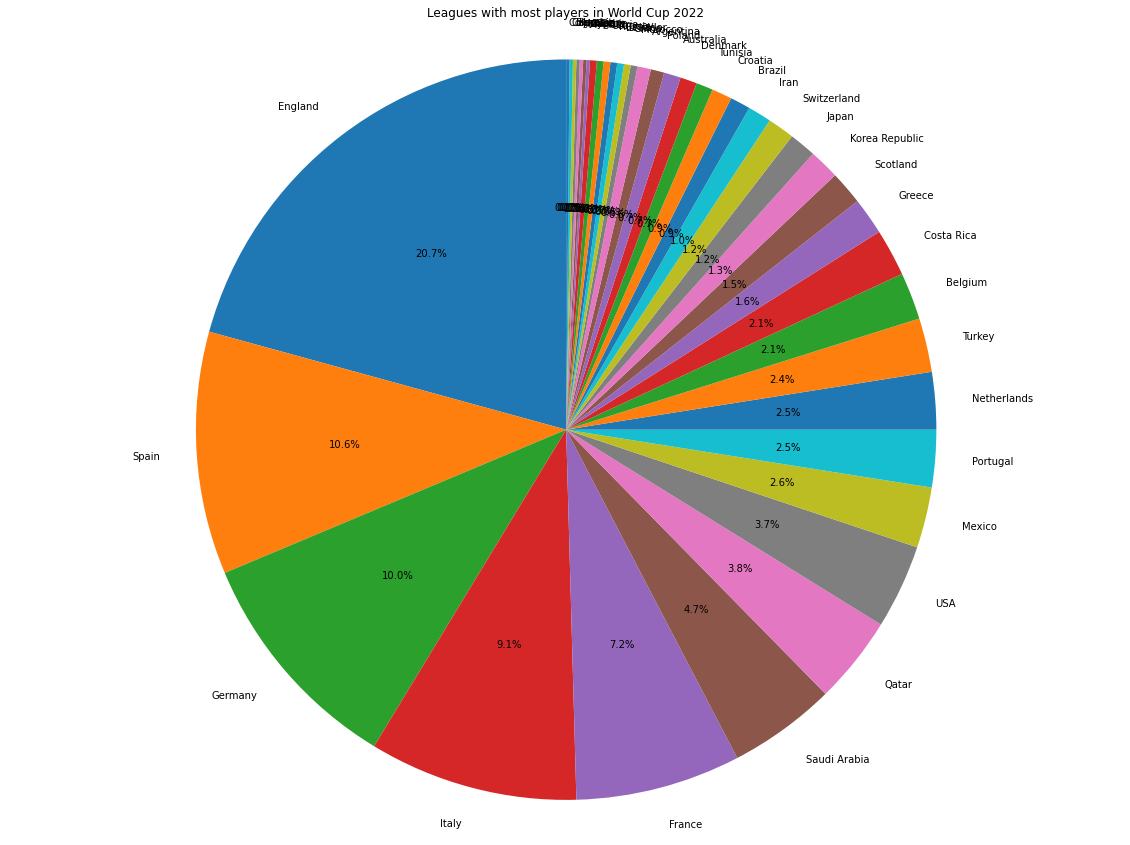

In [150]:
league_count = players_data['Club_country'].value_counts()
plt.figure(figsize=(20,15))
plt.pie(league_count.values, labels=league_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Leagues with most players in World Cup 2022")
plt.show()